In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import matplotlib.mlab as mlab


In [3]:
#Import data from saved location into the kernel

data = pd.read_csv ('/Users/charlieargent/Desktop/University of Exeter/Year 3/AI Project/dataset.csv')
print (data)


      male  age  education  currentSmoker  cigsPerDay  BPMeds  \
0        1   39        4.0              0         0.0     0.0   
1        0   46        2.0              0         0.0     0.0   
2        1   48        1.0              1        20.0     0.0   
3        0   61        3.0              1        30.0     0.0   
4        0   46        3.0              1        23.0     0.0   
5        0   43        2.0              0         0.0     0.0   
6        0   63        1.0              0         0.0     0.0   
7        0   45        2.0              1        20.0     0.0   
8        1   52        1.0              0         0.0     0.0   
9        1   43        1.0              1        30.0     0.0   
10       0   50        1.0              0         0.0     0.0   
11       0   43        2.0              0         0.0     0.0   
12       1   46        1.0              1        15.0     0.0   
13       0   41        3.0              0         0.0     1.0   
14       0   39        2.

In [4]:
#Remove data for education, as it's not necessary for our purpose

#data = data1.drop(['education'],axis=1,inplace=True)


In [5]:
print(data)


      male  age  education  currentSmoker  cigsPerDay  BPMeds  \
0        1   39        4.0              0         0.0     0.0   
1        0   46        2.0              0         0.0     0.0   
2        1   48        1.0              1        20.0     0.0   
3        0   61        3.0              1        30.0     0.0   
4        0   46        3.0              1        23.0     0.0   
5        0   43        2.0              0         0.0     0.0   
6        0   63        1.0              0         0.0     0.0   
7        0   45        2.0              1        20.0     0.0   
8        1   52        1.0              0         0.0     0.0   
9        1   43        1.0              1        30.0     0.0   
10       0   50        1.0              0         0.0     0.0   
11       0   43        2.0              0         0.0     0.0   
12       1   46        1.0              1        15.0     0.0   
13       0   41        3.0              0         0.0     1.0   
14       0   39        2.

In [6]:
data.shape

(4240, 16)

In [7]:
pd.options.display.max_columns


20

In [8]:
#deletes the education column, not aplicable for our project
data = data.drop(columns="education")

In [9]:
data

male  age  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0        1   39              0         0.0     0.0                0   
1        0   46              0         0.0     0.0                0   
2        1   48              1        20.0     0.0                0   
3        0   61              1        30.0     0.0                0   
4        0   46              1        23.0     0.0                0   
5        0   43              0         0.0     0.0                0   
6        0   63              0         0.0     0.0                0   
7        0   45              1        20.0     0.0                0   
8        1   52              0         0.0     0.0                0   
9        1   43              1        30.0     0.0                0   
10       0   50              0         0.0     0.0                0   
11       0   43              0         0.0     0.0                0   
12       1   46              1        15.0     0.0                0   
13       0   41              0         0.0     1.0                0   
14       0   39              1         9.0     0.0                0   
15       0   38              1        20.0     0.0                0   
16       1   48              1        10.0     0.0                0   
17       0   46              1        20.0     0.0                0   
18       0   38              1         5.0     0.0                0   
19       1   41              0         0.0     0.0                0   
20       0   42              1        30.0     0.0                0   
21       0   43              0         0.0     0.0                0   
22       0   52              0         0.0     0.0                0   
23       0   52              1        20.0     0.0                0   
24       1   44              1        30.0     0.0                0   
25       1   47              1        20.0     0.0                0   
26       0   60              0         0.0     0.0                0   
27       1   35              1        20.0     0.0                0   
28       0   61              0         0.0     0.0                0   
29       0   60              0         0.0     0.0                0   
...    ...  ...            ...         ...     ...              ...   
4210     1   50              0         0.0     0.0                0   
4211     1   42              1        40.0     0.0                0   
4212     1   48              1        43.0     0.0                0   
4213     1   48              0         0.0     0.0                0   
4214     0   56              1         5.0     0.0                0   
4215     0   63              0         0.0     0.0                0   
4216     0   59              1        20.0     0.0                0   
4217     0   63              0         0.0     0.0                0   
4218     0   52              0         0.0     0.0                0   
4219     1   48              0         0.0     0.0                0   
4220     1   60              0         0.0     0.0                0   
4221     1   50              0         0.0     0.0                0   
4222     1   53              0         0.0     0.0                0   
4223     1   56              0         0.0     1.0                0   
4224     1   47              1         3.0     0.0                0   
4225     1   45              1        43.0     0.0                0   
4226     1   58              0         0.0     0.0                0   
4227     1   43              1        20.0     0.0                0   
4228     0   50              0         0.0     0.0                0   
4229     0   51              1        20.0     0.0                0   
4230     0   56              1         3.0     0.0                0   
4231     1   58              0         0.0     0.0                0   
4232     1   68              0         0.0     0.0                0   
4233     1   50              1         1.0     0.0                0   
4234     1   51              1

In [10]:
data.head(3) #Way to see just the top 3 rows in the data set

male  age  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39              0         0.0     0.0                0   
1     0   46              0         0.0     0.0                0   
2     1   48              1        20.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   

   TenYearCHD  
0           0  
1           0  
2           0

In [11]:
#Changes the sex column to sex_male, meaning 1 = male, 0 = female
data = data.rename(columns={"male": "Sex_male"})
data = data.rename(columns={"age": "Age"})
data = data.rename(columns={"currentSmoker": "Smoker"})
data = data.rename(columns={"heartRate": "HeartRate"})
data = data.rename(columns={"glucose": "Glucose"})

In [12]:
data


Sex_male  Age  Smoker  cigsPerDay  BPMeds  prevalentStroke  \
0            1   39       0         0.0     0.0                0   
1            0   46       0         0.0     0.0                0   
2            1   48       1        20.0     0.0                0   
3            0   61       1        30.0     0.0                0   
4            0   46       1        23.0     0.0                0   
5            0   43       0         0.0     0.0                0   
6            0   63       0         0.0     0.0                0   
7            0   45       1        20.0     0.0                0   
8            1   52       0         0.0     0.0                0   
9            1   43       1        30.0     0.0                0   
10           0   50       0         0.0     0.0                0   
11           0   43       0         0.0     0.0                0   
12           1   46       1        15.0     0.0                0   
13           0   41       0         0.0     1.0                0   
14           0   39       1         9.0     0.0                0   
15           0   38       1        20.0     0.0                0   
16           1   48       1        10.0     0.0                0   
17           0   46       1        20.0     0.0                0   
18           0   38       1         5.0     0.0                0   
19           1   41       0         0.0     0.0                0   
20           0   42       1        30.0     0.0                0   
21           0   43       0         0.0     0.0                0   
22           0   52       0         0.0     0.0                0   
23           0   52       1        20.0     0.0                0   
24           1   44       1        30.0     0.0                0   
25           1   47       1        20.0     0.0                0   
26           0   60       0         0.0     0.0                0   
27           1   35       1        20.0     0.0                0   
28           0   61       0         0.0     0.0                0   
29           0   60       0         0.0     0.0                0   
...        ...  ...     ...         ...     ...              ...   
4210         1   50       0         0.0     0.0                0   
4211         1   42       1        40.0     0.0                0   
4212         1   48       1        43.0     0.0                0   
4213         1   48       0         0.0     0.0                0   
4214         0   56       1         5.0     0.0                0   
4215         0   63       0         0.0     0.0                0   
4216         0   59       1        20.0     0.0                0   
4217         0   63       0         0.0     0.0                0   
4218         0   52       0         0.0     0.0                0   
4219         1   48       0         0.0     0.0                0   
4220         1   60       0         0.0     0.0                0   
4221         1   50       0         0.0     0.0                0   
4222         1   53       0         0.0     0.0                0   
4223         1   56       0         0.0     1.0                0   
4224         1   47       1         3.0     0.0                0   
4225         1   45       1        43.0     0.0                0   
4226         1   58       0         0.0     0.0                0   
4227         1   43       1        20.0     0.0                0   
4228         0   50       0         0.0     0.0                0   
4229         0   51       1        20.0     0.0                0   
4230         0   56       1         3.0     0.0                0   
4231         1   58       0         0.0     0.0                0   
4232         1   68       0         0.0     0.0                0   
4233         1   50       1         1.0     0.0                0   
4234         1   51       1        43.0     0.0                0   
4235         0   48       1        20.0     NaN                0   
4236         0   44       1        15.0     0.0               

Text(0.5, 0, 'Gender')

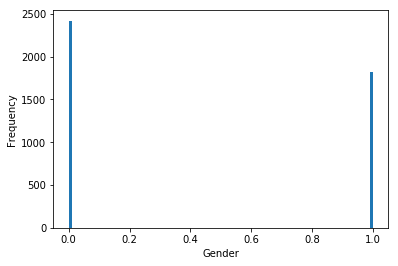

In [13]:
data['Sex_male'].plot(kind='hist', bins = 100)
plt.xlabel('Gender')


Text(0.5, 1.0, 'Histogram for whole data frequency')

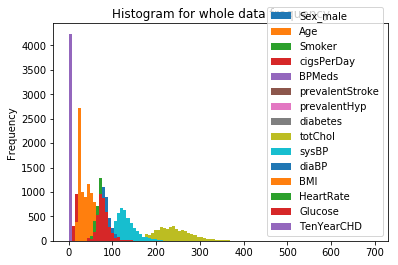

In [14]:
data.plot(kind='hist', bins = 100)
data
plt.title('Histogram for whole data frequency')


In [15]:
data


Sex_male  Age  Smoker  cigsPerDay  BPMeds  prevalentStroke  \
0            1   39       0         0.0     0.0                0   
1            0   46       0         0.0     0.0                0   
2            1   48       1        20.0     0.0                0   
3            0   61       1        30.0     0.0                0   
4            0   46       1        23.0     0.0                0   
5            0   43       0         0.0     0.0                0   
6            0   63       0         0.0     0.0                0   
7            0   45       1        20.0     0.0                0   
8            1   52       0         0.0     0.0                0   
9            1   43       1        30.0     0.0                0   
10           0   50       0         0.0     0.0                0   
11           0   43       0         0.0     0.0                0   
12           1   46       1        15.0     0.0                0   
13           0   41       0         0.0     1.0                0   
14           0   39       1         9.0     0.0                0   
15           0   38       1        20.0     0.0                0   
16           1   48       1        10.0     0.0                0   
17           0   46       1        20.0     0.0                0   
18           0   38       1         5.0     0.0                0   
19           1   41       0         0.0     0.0                0   
20           0   42       1        30.0     0.0                0   
21           0   43       0         0.0     0.0                0   
22           0   52       0         0.0     0.0                0   
23           0   52       1        20.0     0.0                0   
24           1   44       1        30.0     0.0                0   
25           1   47       1        20.0     0.0                0   
26           0   60       0         0.0     0.0                0   
27           1   35       1        20.0     0.0                0   
28           0   61       0         0.0     0.0                0   
29           0   60       0         0.0     0.0                0   
...        ...  ...     ...         ...     ...              ...   
4210         1   50       0         0.0     0.0                0   
4211         1   42       1        40.0     0.0                0   
4212         1   48       1        43.0     0.0                0   
4213         1   48       0         0.0     0.0                0   
4214         0   56       1         5.0     0.0                0   
4215         0   63       0         0.0     0.0                0   
4216         0   59       1        20.0     0.0                0   
4217         0   63       0         0.0     0.0                0   
4218         0   52       0         0.0     0.0                0   
4219         1   48       0         0.0     0.0                0   
4220         1   60       0         0.0     0.0                0   
4221         1   50       0         0.0     0.0                0   
4222         1   53       0         0.0     0.0                0   
4223         1   56       0         0.0     1.0                0   
4224         1   47       1         3.0     0.0                0   
4225         1   45       1        43.0     0.0                0   
4226         1   58       0         0.0     0.0                0   
4227         1   43       1        20.0     0.0                0   
4228         0   50       0         0.0     0.0                0   
4229         0   51       1        20.0     0.0                0   
4230         0   56       1         3.0     0.0                0   
4231         1   58       0         0.0     0.0                0   
4232         1   68       0         0.0     0.0                0   
4233         1   50       1         1.0     0.0                0   
4234         1   51       1        43.0     0.0                0   
4235         0   48       1        20.0     NaN                0   
4236         0   44       1        15.0     0.0               

In [16]:
#Checks how many missing values there are
data.isnull().sum()



Sex_male             0
Age                  0
Smoker               0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
HeartRate            1
Glucose            388
TenYearCHD           0
dtype: int64

In [17]:
#Drops any rows with missing data
data.dropna(axis=0,inplace=True)


In [18]:
#Checks for missing values again
data.isnull().sum()

Sex_male           0
Age                0
Smoker             0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
HeartRate          0
Glucose            0
TenYearCHD         0
dtype: int64

In [19]:
#Gives the shape of the data frame, here there are 3751 rows, with 15 columns

data.shape

(3751, 15)

In [39]:
import plotly.express as px
fig = px.scatter(data, x = 'cigsPerDay', y = 'Smoker')
fig.show()



In [40]:
fig = px.scatter(data, x="totChol", y="BMI", color="TenYearCHD")

fig.show()

In [27]:
data["e"] = data["totChol"]/100
fig = px.scatter(data, x="totChol", y="BMI", color="TenYearCHD", error_x="e", error_y="e")
fig.show()

In [28]:
data["e"] = data["cigsPerDay"]/100
fig = px.scatter(data, x="cigsPerDay", y="BMI", color="TenYearCHD", error_x="e", error_y="e")
fig.show()

In [29]:
fig = px.scatter(data, x="BMI", y="cigsPerDay", color="TenYearCHD", marginal_y="rug", marginal_x="histogram")
fig.show()

In [37]:
fig = px.scatter_matrix(data, dimensions=["BMI", "cigsPerDay", "prevalentHyp", "prevalentStroke"], color="TenYearCHD",template="plotly_dark",
            color_discrete_sequence= px.colors.sequential.Plasma[3::5])
fig.show()

In [65]:
fig = px.scatter_matrix(data, dimensions=["totChol", "sysBP", "diaBP", "HeartRate"], color="TenYearCHD")
fig.show()

In [66]:
fig = px.scatter_matrix(data, dimensions=["totChol", "sysBP", "BMI", "cigsPerDay"], color="TenYearCHD")
fig.show()

In [69]:
fig = px.scatter_matrix(data, dimensions=["prevalentStroke", "prevalentHyp", "diaBP", "HeartRate"], color="TenYearCHD")
fig.show()

In [38]:
fig = px.scatter(data, x="BMI", y="cigsPerDay", animation_frame="Age",
           size="totChol", color="TenYearCHD", facet_col="prevalentHyp",
           log_x=True, size_max=45, range_x=[20,30], range_y=[0,70])
fig.show()

In [25]:
fig = px.scatter(data, x="cigsPerDay", y="totChol", animation_frame="Age",
           size="diabetes", color="HeartRate", facet_col="TenYearCHD",
           log_x=True, size_max=45, range_x=[5,30], range_y=[150,300])
fig.show()

In [72]:
fig = px.density_heatmap(data, x="prevalentHyp", y="prevalentStroke", marginal_x="rug", marginal_y="histogram")
fig.show()

In [64]:
fig = px.bar(data, x='Sex_male', y="TenYearCHD", color="Smoker", barmode="group")
fig.show()

In [33]:
fig = px.parallel_coordinates(data, color="TenYearCHD", labels={"TenYearCHD": "CHD - Y/N",
                  "BMI": "BMI", "diabetes": "cigsPerDay",
                  "prevalentStroke": "Stroke", "prevalentHyp": "Hyp", },
                    color_continuous_scale=px.colors.diverging.Tealrose, color_continuous_midpoint=0.5)
fig.show()

In [34]:
fig = px.density_heatmap(data, x="sysBP", y="diaBP", marginal_x="rug", marginal_y="histogram")
fig.show()